In [1]:
#importing libraries 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt 
import ast

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


**BAR**

In [2]:
import seaborn as sns 

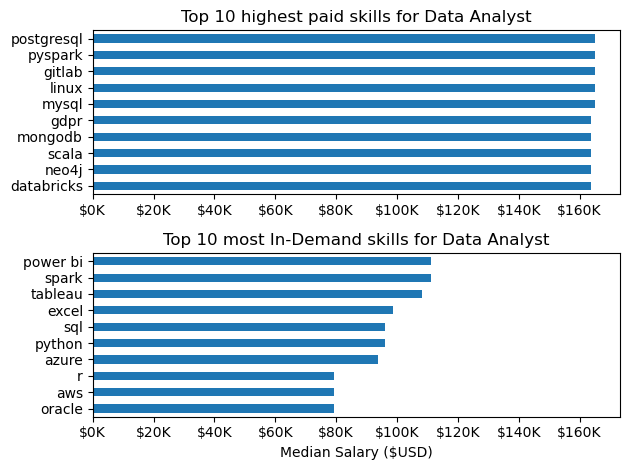

In [3]:
df_DA_india = df[(df['job_title_short'] == 'Data Analyst') &  (df['job_country'] == "India")]
df_DA_india = df_DA_india.dropna(subset = ['salary_year_avg'])

df_DA_india = df_DA_india.explode('job_skills')

df_DA_india_group = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])
df_DA_top_pay = df_DA_india_group.sort_values(by = 'median' , ascending= False).head(10)
df_DA_skills = df_DA_india_group.sort_values(by='count' , ascending = False).head(10).sort_values(by='median' , ascending = False)

fig , ax = plt.subplots(2,1)
df_DA_top_pay.plot(kind = 'barh',  y = 'median' , ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter( lambda x , pos : F'${int(x/1000)}K'))
ax[0].legend().set_visible(False)


df_DA_skills.plot(kind = 'barh', y = 'median', ax=ax[1] , legend = False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most In-Demand skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter( lambda x, pos : F'${int(x/1000)}K'))

fig.tight_layout()

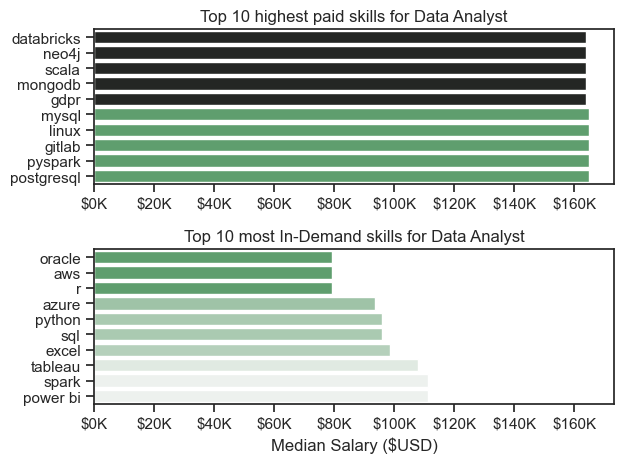

In [23]:
df_DA_india = df[(df['job_title_short'] == 'Data Analyst') &  (df['job_country'] == "India")]
df_DA_india = df_DA_india.dropna(subset = ['salary_year_avg'])

df_DA_india = df_DA_india.explode('job_skills')

df_DA_india_group = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])
df_DA_top_pay = df_DA_india_group.sort_values(by = 'median' , ascending= False).head(10)
df_DA_skills = df_DA_india_group.sort_values(by='count' , ascending = False).head(10).sort_values(by='median' , ascending = False)


#plotting 

fig , ax = plt.subplots(2,1)

sns.barplot( data = df_DA_top_pay , x = 'median' , y= df_DA_top_pay.index , ax=ax[0] , hue = 'median' , palette = 'dark:g')
ax[0].get_legend().remove()
sns.set_theme(style = 'whitegrid')
#df_DA_top_pay.plot(kind = 'barh',  y = 'median' , ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter( lambda x , pos : F'${int(x/1000)}K'))
ax[0].legend().set_visible(False)





sns.barplot( data = df_DA_skills , x = 'median' , y= df_DA_skills.index, ax=ax[1] , hue = 'median', palette = 'light:g_r')
ax[1].get_legend().remove()
sns.set_theme(style = 'ticks')
#df_DA_skills.plot(kind = 'barh', y = 'median', ax=ax[1] , legend = False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most In-Demand skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter( lambda x, pos : F'${int(x/1000)}K'))

fig.tight_layout()

**HISTOGRAM**


Text(0, 0.5, 'Number of Jobes')

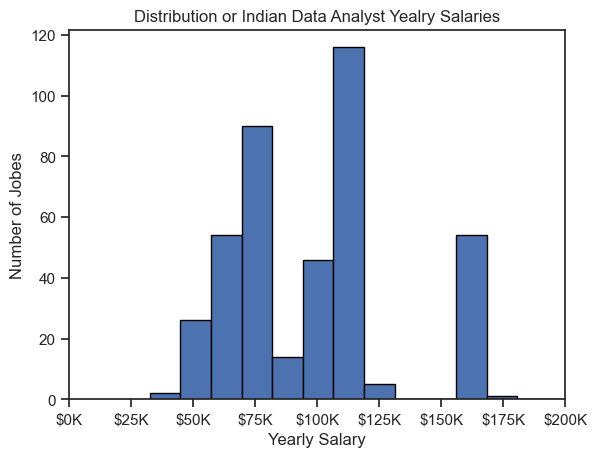

In [24]:
df_DA_india['salary_year_avg'].plot(kind = 'hist' , bins = 50 , edgecolor= 'black' )
plt.xlim(0,200000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))
plt.title('Distribution or Indian Data Analyst Yealry Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobes')

Text(12.444444444444445, 0.5, 'Number of Jobes')

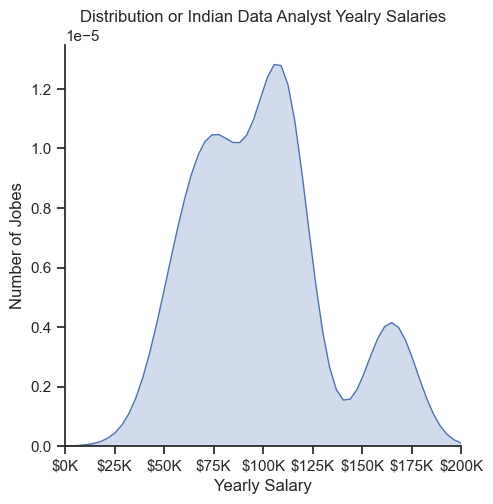

In [32]:
sns.displot(data = df_DA_india['salary_year_avg'] , kind = 'kde' , fill = True  )
sns.set_theme(style = 'whitegrid')
plt.xlim(0,200000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))
plt.title('Distribution or Indian Data Analyst Yealry Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobes')

**BOXPLOTS**

C:\Users\ranveer\AppData\Local\Temp\ipykernel_4536\1543372517.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot( job_list , labels = job_titles , vert = False)


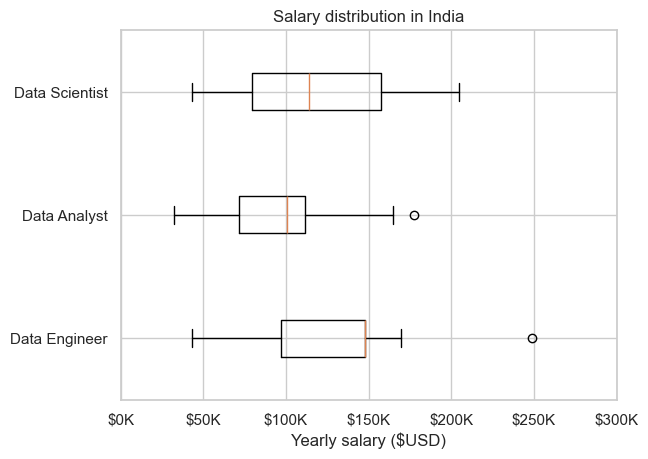

In [34]:
job_titles = [ 
    'Data Engineer' ,
    'Data Analyst',
    'Data Scientist'
]
df_india = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()
df_india = df_india.dropna(subset = ['salary_year_avg'])
job_list = [df_india[df_india['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot( job_list , labels = job_titles , vert = False)
plt.title('Salary distribution in India')
plt.xlabel('Yearly salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.show()

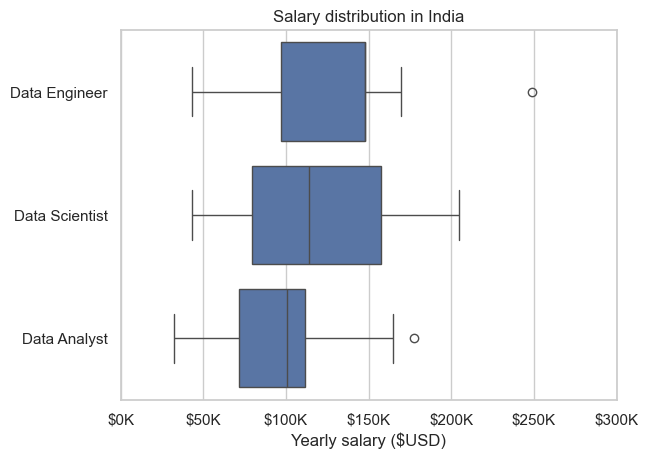

In [38]:
sns.boxplot(data = df_india , x = 'salary_year_avg' ,  y= 'job_title_short' ,  )

plt.title('Salary distribution in India')
plt.xlabel('Yearly salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.show()